In [41]:
import os
import pandas as pd
import numpy as np
import scipy as sts
import matplotlib.pyplot as plt
import plotly.express as px

import gmaps

In [43]:
world_df= pd.read_csv("../Resources/owid-covid-data.csv")


updated_world_df=world_df.drop(["iso_code", "total_cases", "new_cases","new_deaths_per_million","total_tests","new_tests",
                                "new_tests_smoothed_per_thousand","population","median_age","aged_70_older",
                                "extreme_poverty","female_smokers","male_smokers",
                               "handwashing_facilities","hospital_beds_per_thousand","life_expectancy",
                               "new_tests_smoothed","new_tests_per_thousand","tests_units","total_deaths",
                               "new_deaths","total_cases_per_million","new_cases_per_million"], axis=1)

updated_world_df=updated_world_dfupdated_world_df=updated_world_df.rename(columns={"location":"Country", "continent":"Continet","date":"Date",
                                                  "total_deaths_per_million":"Total Deaths Per Million",
                                                  "total_tests_per_thousand":"Total Test Per Thousands",
                                                 "population_density":"Population Density","aged_65_older":"Aged 65 or older",
                                                 "gdp_per_capita":"GDP Per Capita","cvd_death_rate":"Covid Death Rate",
                                                 "stringency_index":"Stringency Index"})

updated_world_df.fillna(0, inplace=True)

updated_world_df.head()

,Continet,Country,Date,Total Deaths Per Million,Total Test Per Thousands,Stringency Index,Population Density,Aged 65 or older,GDP Per Capita,Covid Death Rate,diabetes_prevalence
0,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,54.422,2.581,1803.987,597.029,9.59
1,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,54.422,2.581,1803.987,597.029,9.59
2,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,54.422,2.581,1803.987,597.029,9.59
3,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,54.422,2.581,1803.987,597.029,9.59
4,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,54.422,2.581,1803.987,597.029,9.59


In [44]:
#Number Hospital Beds is based on the lastest year per Country

data = pd.read_csv("../Resources/data.csv")

who_df = data.iloc[data.groupby("Country")["Year"].agg(pd.Series.idxmax)]
who_df.reset_index(drop=True).set_index("Country")
who_df=who_df.rename(columns={"Hospital beds (per 10 000 population)":"Hospital Beds (per 10K people)"})
hospital_beds_df=who_df.drop(["Year"], axis=1)

hospital_beds_df.head()

,Country,Hospital Beds (per 10K people)
0,Afghanistan,5
16,Albania,29
29,Algeria,19
31,Angola,8
32,Antigua and Barbuda,38


In [45]:
#Smoking Percentage is based on the lastest year per Country

smokingdata = pd.read_csv("../Resources/smokingdata.csv")

smokingdata_df = smokingdata.iloc[smokingdata.groupby("Country")["Year"].agg(pd.Series.idxmax)]

clean_smoking_data = smokingdata_df.drop(["Estimate of current cigarette smoking prevalence (%).1", "Estimate of current cigarette smoking prevalence (%).2", 
                                       "Estimate of current tobacco smoking prevalence (%)", "Estimate of current tobacco smoking prevalence (%).1", 
                                       "Estimate of current tobacco smoking prevalence (%).2", "Estimate of current tobacco use prevalence (%)", 
                                       "Estimate of current tobacco use prevalence (%).1", "Estimate of current tobacco use prevalence (%).2"], axis=1)

 
clean_smoking_data=clean_smoking_data.rename(columns={"Estimate of current cigarette smoking prevalence (%)":"Smoking Prevalence (%)"})
smoking_data = clean_smoking_data
smoking_prevalence=list(smoking_data["Smoking Prevalence (%)"])
smoking_percentage=[]

for x in smoking_prevalence:
    y=x.split("[")
    smoking_percentage.append(y[0])
    

    
column_values = pd.Series(smoking_percentage)
smoking_data.insert(loc=2, column="Smoking Percetage", value=column_values)
smoking_year_df=smoking_data.drop(["Smoking Prevalence (%)"], axis=1)

smoking_df=smoking_year_df.drop(["Year"], axis=1)

smoking_df.head()

,Country,Smoking Percetage
1,Albania,11.20
7,Algeria,15.20
13,Andorra,21.40
19,Argentina,31.40
25,Armenia,6.00


In [5]:
world_df=pd.read_csv("../Resources/dsh_simple.csv")

world_df=world_df[["Countryname","IfclosedduetoCOVID19whend","Statusof Schoolsaresomeall (copy) (group)",
          "Latitude (generated)","Longitude (generated)","Incomelevelname"]]

income_level_df=world_df.rename(columns={"Countryname":"Country", "Latitude (generated)":"Latitude", 
                      "Longitude (generated)": "Longitude", "Incomelevelname": "Income Level",
                        "Statusof Schoolsaresomeall (copy) (group)":"School Status"})
income_df=income_level_df.drop(["IfclosedduetoCOVID19whend"], axis =1)

income_df.head()

,Country,School Status,Latitude,Longitude,Income Level
0,Eritrea,Closed,15.9820,38.0200,Low income
1,Guinea-Bissau,Closed,12.1910,-14.4750,Low income
2,San Marino,Closed,43.9420,12.4611,High income
3,Georgia,Closed,42.0500,43.5760,Upper middle income
4,Italy,Closed,44.3713,11.1084,High income


In [6]:
combined_df=pd.merge(updated_world_df,hospital_beds_df,on="Country",how="left").merge(smoking_df,on="Country",how="left" ).merge(income_df,on="Country",how="left")

combined_df.head(5)

,Continet,Country,Date,Total Deaths Per Million,Total Test Per Thousands,Stringency Index,Population Density,Aged 65 or older,GDP Per Capita,Covid Death Rate,diabetes_prevalence,Hospital Beds (per 10K people),Smoking Percetage,School Status,Latitude,Longitude,Income Level
0,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,54.422,2.581,1803.987,597.029,9.59,5.0,NaN,Closed,34.023,65.5267,Low income
1,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,54.422,2.581,1803.987,597.029,9.59,5.0,NaN,Closed,34.023,65.5267,Low income
2,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,54.422,2.581,1803.987,597.029,9.59,5.0,NaN,Closed,34.023,65.5267,Low income
3,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,54.422,2.581,1803.987,597.029,9.59,5.0,NaN,Closed,34.023,65.5267,Low income
4,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,54.422,2.581,1803.987,597.029,9.59,5.0,NaN,Closed,34.023,65.5267,Low income


In [92]:
comb=combined_df.sort_values(by='Date', ascending=True)
comb.rename(columns={"Continet":"Continent"}, inplace=True)

In [93]:
sch_df=comb.loc[comb["Date"]=="2020-06-21"]
sch_df=sch_df.dropna(subset=['Income Level', 'School Status'])
schooltype_df=pd.DataFrame(sch_df["School Status"].value_counts())
schooltype_df=schooltype_df.reset_index()
schooltype_df=schooltype_df.rename(columns={"index": "Closure type"})
schooltype_df

,Closure type,School Status
0,Closed,111
1,Open with limitations,44
2,Closed (in select areas),3
3,Open,2
4,Seasonal school closures,1


<IPython.core.display.Javascript object>


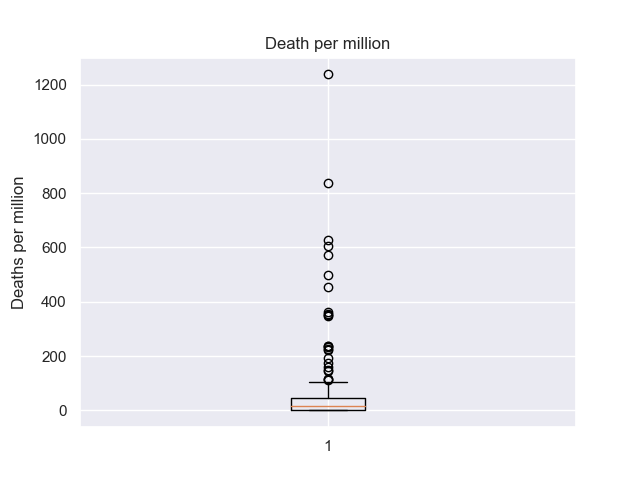

In [94]:
times = list( sch_df['Total Deaths Per Million'])
fig1, ax1 = plt.subplots()
ax1.set_title('Death per million')
ax1.set_ylabel('Deaths per million')
ax1.boxplot(times)
plt.show()

In [95]:





quartiles1 = sch_df['Total Deaths Per Million'].quantile([.25,.5,.75])
lowerq1 = quartiles1[0.25]
upperq1 = quartiles1[0.75]
iqr1 = upperq1-lowerq1

lower_bound1 = lowerq1 - (1.5*iqr1)
upper_bound1 = upperq1 + (1.5*iqr1)

quartiles2 = sch_df['diabetes_prevalence'].quantile([.25,.5,.75])
lowerq2 = quartiles2[0.25]
upperq2 = quartiles2[0.75]
iqr2 = upperq2-lowerq2

lower_bound2 = lowerq2 - (1.5*iqr2)
upper_bound2 = upperq2 + (1.5*iqr2)



Cleaned_df = sch_df.loc[( sch_df['Total Deaths Per Million']> lower_bound1)&
                        (sch_df['Total Deaths Per Million'] < upper_bound1)& 
                        (sch_df['diabetes_prevalence'] < upper_bound2)&
                       (sch_df['diabetes_prevalence'] > lower_bound2)& 
                       (sch_df['Income Level']!="NaN")]



Cleaned_df.head()

,Continent,Country,Date,Total Deaths Per Million,Total Test Per Thousands,Stringency Index,Population Density,Aged 65 or older,GDP Per Capita,Covid Death Rate,diabetes_prevalence,Hospital Beds (per 10K people),Smoking Percetage,School Status,Latitude,Longitude,Income Level
7972,Oceania,Fiji,2020-06-21,0.000,0.0,0.0,49.562,6.224,8702.975,412.820,14.49,23.0,NaN,Closed,-17.7941,177.9783,Upper middle income
16892,North America,Nicaragua,2020-06-21,9.661,0.0,0.0,51.667,5.445,5321.444,137.016,11.47,9.0,NaN,Open with limitations,12.6920,-85.0300,Lower middle income
18444,Asia,Philippines,2020-06-21,10.495,0.0,0.0,351.873,4.803,7599.188,370.437,7.07,5.0,NaN,Seasonal school closures,17.1810,121.2560,Lower middle income
9717,North America,Guatemala,2020-06-21,28.690,0.0,0.0,157.834,4.694,7423.808,155.898,10.18,6.0,NaN,Closed,15.1240,-90.7110,Upper middle income
23921,Asia,United Arab Emirates,2020-06-21,30.434,0.0,0.0,112.442,1.144,67293.483,317.840,17.26,12.0,NaN,Closed,23.9299,53.9031,High income


In [96]:
%matplotlib notebook
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import datetime as datetime

<IPython.core.display.Javascript object>


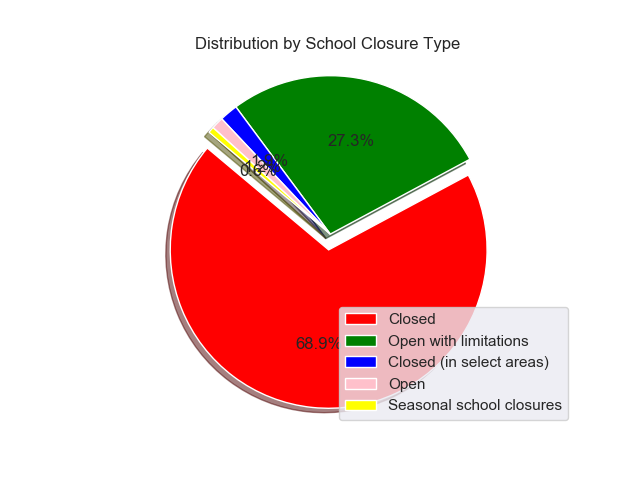

In [97]:
labels= list(schooltype_df["Closure type"])
sizes =list(schooltype_df["School Status"])
colors=["red", "green", "blue","pink","yellow"]
explode=[0.1,0,0,0,0]
plt.pie(sizes, explode=explode, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140, labeldistance=1.1
       )
plt.title("Distribution by School Closure Type")
plt.axis("equal")
plt.legend(labels, loc="lower right")
plt.show()
#plot Label


In [98]:
Open_df=comb.loc[(comb["School Status"]!="Closed") &(comb["Date"]!="2020-06-22")]
Closed_df=comb.loc[(comb["School Status"]=="Closed")&(comb["Date"]!="2020-06-22")]


In [99]:
Close_df=Closed_df[["Date", "Total Deaths Per Million"]]
Opened_df=Open_df[["Date", "Total Deaths Per Million"]]


In [100]:
population1=Close_df.loc[Close_df["Date"]=="2020-06-21"]["Total Deaths Per Million"]
population2=Opened_df.loc[Opened_df["Date"]=="2020-06-21"]["Total Deaths Per Million"]

print(population1.mean())
print(population2.mean())
print(population1.var())
print(population2.var())



52.879893805309756
76.87849484536082
20526.928464881486
25015.028961356744


In [101]:
import scipy.stats as stats
stats.ttest_ind(population1,population2, equal_var = False)

Ttest_indResult(statistic=-1.1446854575002372, pvalue=0.2537377898422757)

In [102]:
Date =list(comb["Date"].drop_duplicates())
Date.remove("2020-06-22")
dates=Date



<IPython.core.display.Javascript object>


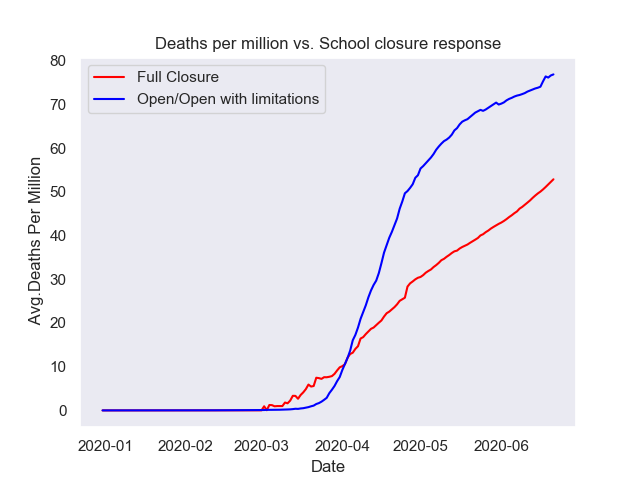

In [108]:
x_values = [datetime.datetime.strptime(d,"%Y-%m-%d").date() for d in dates]
y_values =Close_df.groupby("Date").mean()
z_values=Opened_df.groupby("Date").mean()
ax = plt.gca()
#get axes


formatter = mdates.DateFormatter("%Y-%m")
ax.xaxis.set_major_formatter(formatter)

locator = mdates.MonthLocator()
ax.xaxis.set_major_locator(locator)

Closed, =plt.plot(x_values, y_values, color="red", label="Full Closure")
Open, =plt.plot(x_values, z_values, color="blue", label="Open/Open with limitations")
plt.legend(handles=[Closed, Open], loc="best")

plt.ylabel(" Avg.Deaths Per Million")
plt.xlabel("Date")
plt.title("Deaths per million vs. School closure response")
plt.grid()
plt.show()



In [112]:

fig = px.scatter(Cleaned_df, x='diabetes_prevalence', y='Total Deaths Per Million',facet_col="Continent"
                 , hover_name="Country", trendline="ols", color="Continent",
                 labels={'diabetes_prevalence': "diabeties(%)"})
fig.update_layout(title='Diabetes Prevalence vs Total deaths per million')

fig.show()

<IPython.core.display.Javascript object>


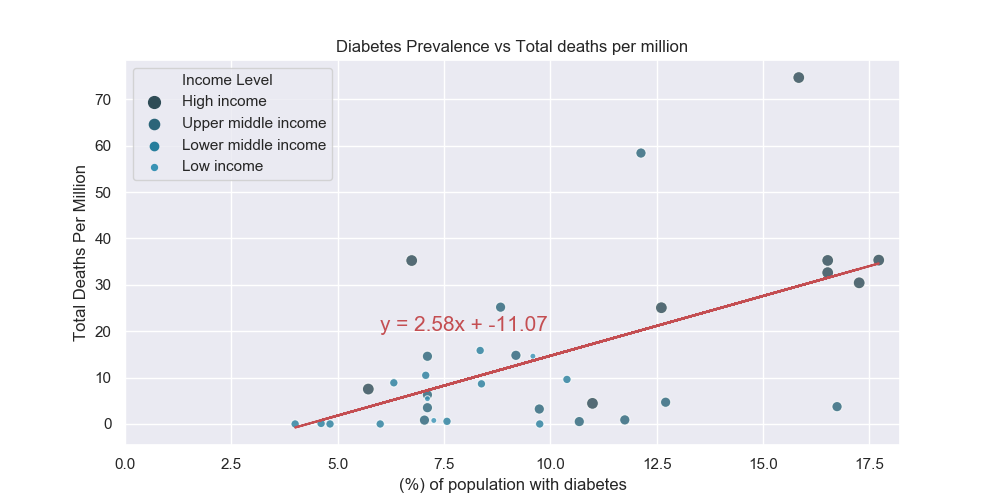

In [110]:
from scipy.stats import linregress
import seaborn as sns

x_values = Cleaned_df.loc[Cleaned_df["Continent"]=="Asia"]["diabetes_prevalence"]
y_values = Cleaned_df.loc[Cleaned_df["Continent"]=="Asia"]['Total Deaths Per Million']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plt.scatter(x_values,y_values, c=iris.target)
sns.set()
with sns.color_palette("PuBuGn_d"):
    plt.figure(figsize=(10,5))
    sns.scatterplot(x_values,y_values,hue=Cleaned_df["Income Level"], hue_order=["High income","Upper middle income",
                                             "Lower middle income","Low income"],alpha =0.8, 
                                    size=Cleaned_df["Income Level"], size_order=["High income","Upper middle income",
                                                                         "Lower middle income","Low income"],
                legend="brief" )
    plt.title("Diabetes Prevalence vs Total deaths per million")
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel("(%) of population with diabetes")
    plt.annotate(line_eq,(6,20),fontsize=15,color="r")
    plt.xlim(0,x_values.max()+0.5)
    plt.show()
